In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np

mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

1D arrays `lon` and `lat`, centered on MCOM and incrementing by 5 degrees. 


[-116.88037186 -111.88037186 -106.88037186 -101.88037186  -96.88037186
  -91.88037186  -86.88037186] [23.5818617 28.5818617 33.5818617 38.5818617 43.5818617]


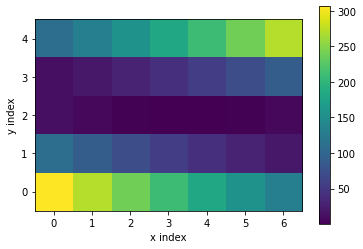

In [5]:
#nlon and nlat are assumed to be odd for integer value median
nlon = 7
nlat = 5
dlon, dlat = 5.0, 5.0
interval = 5

d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower')
plt.colorbar(im)
ax.set_xlabel('x index')
ax.set_ylabel('y index')


lon = np.linspace(mcom_lon - (nlon-(nlon+1)/2) * interval, mcom_lon + (nlon-(nlon+1)/2) * interval, nlon)
lat = np.linspace(mcom_lat - (nlat-(nlat+1)/2) * interval, mcom_lat + (nlat-(nlat+1)/2) * interval, nlat)

#lon defined from West to East
#lat defined from South to North
print(lon, lat)

(-116.8803718553, -86.8803718553, 23.581861701500003, 43.5818617015)


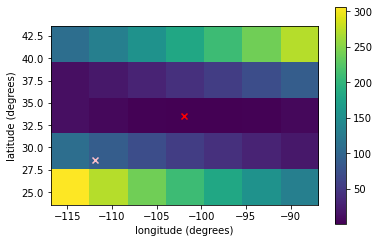

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(lon.min(), lon.max(), lat.min(), lat.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.scatter(lon[1], lat[1], marker='x', color='pink')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
print(ax.axis())

 `lat_edge` and `lon_edge`

[-119.38037186 -114.38037186 -109.38037186 -104.38037186  -99.38037186
  -94.38037186  -89.38037186  -84.38037186]
[21.0818617 26.0818617 31.0818617 36.0818617 41.0818617 46.0818617]


Text(0, 0.5, 'latitude (degrees)')

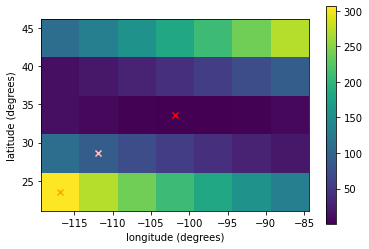

In [7]:
def centers_to_edges_1d(x):
    #initiate array for edge values
    edges =  np.empty(len(x)+1)
    #run loop over center values
    for x_index, x_val in enumerate(x):
        #translate all center values to the left one-half of the interval
        edge = x_val-interval/2
        #add edge value to the new edge array
        edges[x_index] = edge
        #if we come to the end of our center array,...
        if x_index == len(x)-1:
            #edge arrays have lengths of one greater than center arrays
            #the previous seven edge values were originally center values that moved to the left
            #this edge value is the last center value translated to the right one-half the interval
            edge = x_val+interval/2
            #add last edge value
            edges[x_index+1] = edge
    #return array
    return edges

#Alternatively, 
# def centers_to_edges_1d(x):
#     x_edge = np.arange(x.min() - interval/2, (x.max() + interval/2) + interval, interval)
#     return x_edge

lon_edge = centers_to_edges_1d(lon)
lat_edge = centers_to_edges_1d(lat)
print(lon_edge)
print(lat_edge)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower', extent=(lon_edge.min(), lon_edge.max(), lat_edge.min(), lat_edge.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.scatter(lon[1], lat[1], marker='x', color='pink')
ax.scatter(lon[0], lat[0], marker='x', color='orange')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

`pcolormesh` 

<ipython-input-8-d995570de237>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(lon, lat, d)


Text(0, 0.5, 'latitude (degrees)')

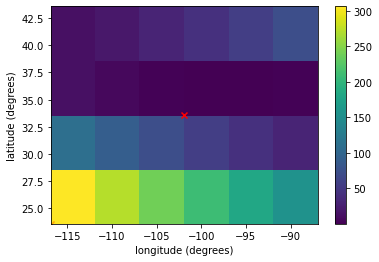

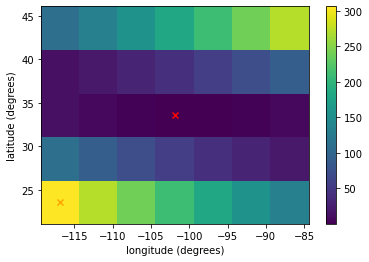

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.scatter(lon[0], lat[0], marker='x', color='orange')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge, lat_edge, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.scatter(lon[0], lat[0], marker='x', color='orange')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

`meshgrid` 

Text(0, 0.5, 'latitude (degrees)')

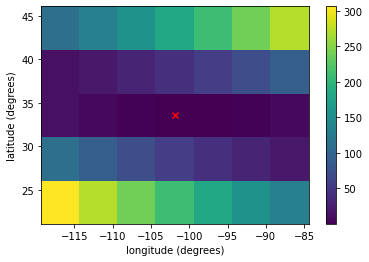

In [9]:
lon_edge_2d, lat_edge_2d = np.meshgrid(lon_edge, lat_edge)

# print(d)
# print(lat_edge_2d)
# print(lon_edge_2d)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge_2d, lat_edge_2d, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')